Importing libraries and loading data

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

RANDOM_STATE = 55

In [42]:
df = pd.read_csv("G:\ML\heart_2020_cleaned.csv")

Dataset Information 

In [43]:
print("Số mẫu dữ liệu: ", df.shape[0])
print("Số thuộc tính: ", df.shape[1])

Số mẫu dữ liệu:  319795
Số thuộc tính:  18


In [44]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Các trường dữ liệu của Dataset


* HeartDisease (Target): Có bị bệnh tim hay không.
* BMI: Chỉ số khối cơ thể, đánh giá tình trạng cân nặng so với chiều cao.
* Smoking: Có hút thuốc không (Yếu tố nguy cơ tim mạch).
* AlcoholDrinking: Có uống rượu không (Ảnh hưởng đến hệ tim mạch).
* Stroke: Có từng bị đột quỵ không (Liên quan đến bệnh tim, tắc nghẽn mạch máu).
* PhysicalHealth: Số ngày trong tháng có sức khỏe thể chất kém.
* MentalHealth: Số ngày trong tháng có sức khỏe tinh thần kém.
* DiffWalking: Khó khăn khi leo cầu thang (Chỉ số liên quan đến thể chất).
* Sex: Giới tính của người tham gia.
* AgeCategory: Nhóm tuổi của người tham gia (dạng phân loại).
* Race: Chủng tộc (thông tin nhân khẩu học).
* Diabetic: Có mắc tiểu đường không.
* PhysicalActivity: Có tập thể dục trong 30 ngày qua không (ngoài công việc).
* GenHealth: Đánh giá tổng quan về sức khỏe cá nhân.
* SleepTime: Số giờ ngủ trung bình mỗi ngày.
* Asthma: Có mắc bệnh hen suyễn không.
* KidneyDisease: Có mắc bệnh thận không.
* SkinCancer: Có từng bị ung thư da không.

EXPLORATORY DATA ANALYSIS

In [45]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns

print("Số thuộc tính số: ", len(numerical_features))
print("Số thuộc tính phân loại: ", len(categorical_features))

Số thuộc tính số:  4
Số thuộc tính phân loại:  14


Kiểm tra dữ liệu bị khuyết

In [46]:
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Kiểm tra dữ liệu ngoại lai cho các thuộc tính kiểu numeric

BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]


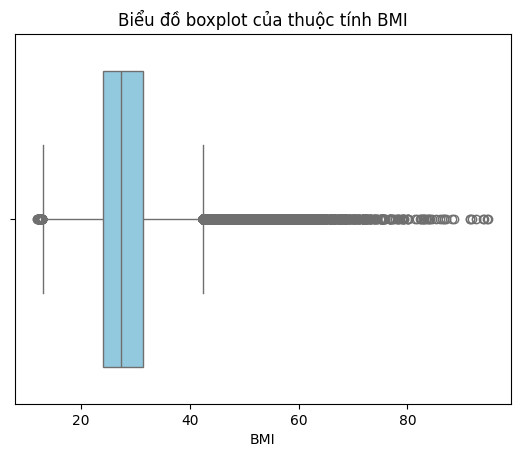

PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]


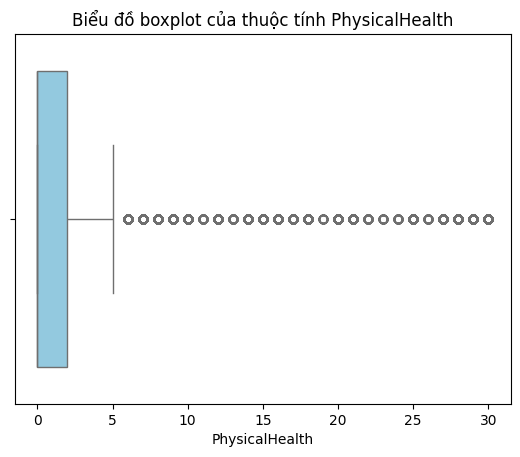

MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]


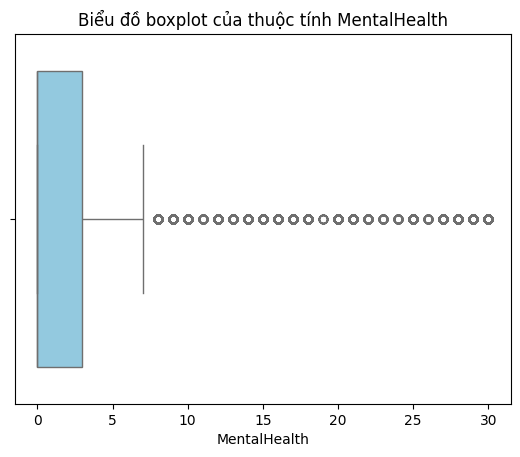

SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]


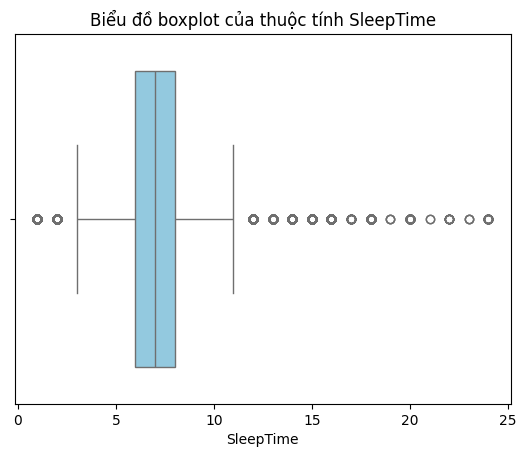

In [47]:
for col in numerical_features:
    print(col, df[col].unique())    
    sns.boxplot(x=df[col], color="skyblue")
    plt.title("Biểu đồ boxplot của thuộc tính " + col)
    plt.show()

In [48]:
print(numerical_features)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


In [49]:
winsor = Winsorizer(capping_method='quantiles', tail='both', fold=0.05, variables=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'])

In [50]:
df = winsor.fit_transform(df)

BMI [20.12 20.34 26.58 ... 39.55 32.97 30.06]


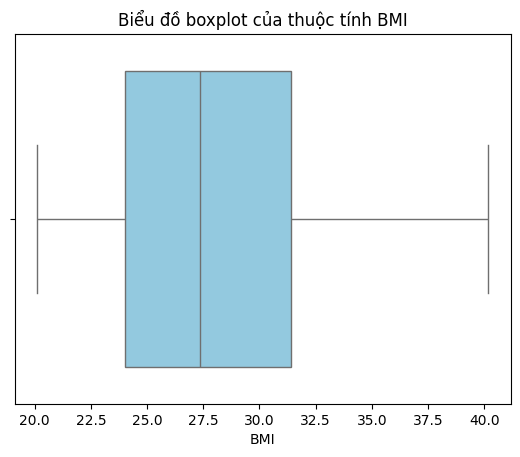

PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]


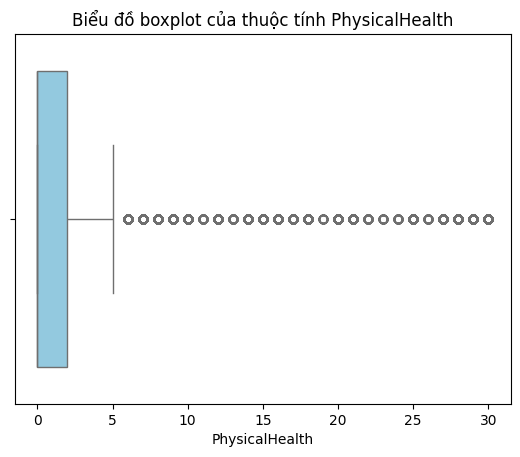

MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]


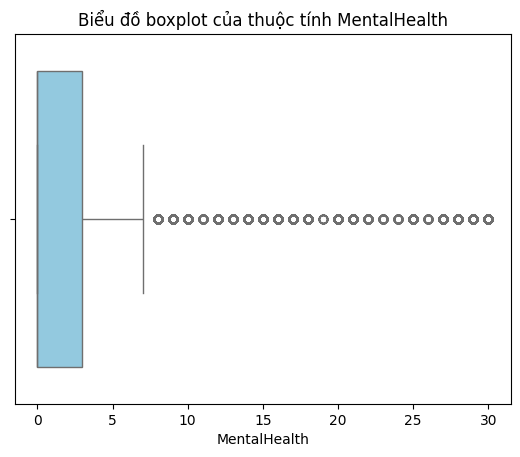

SleepTime [5. 7. 8. 6. 9.]


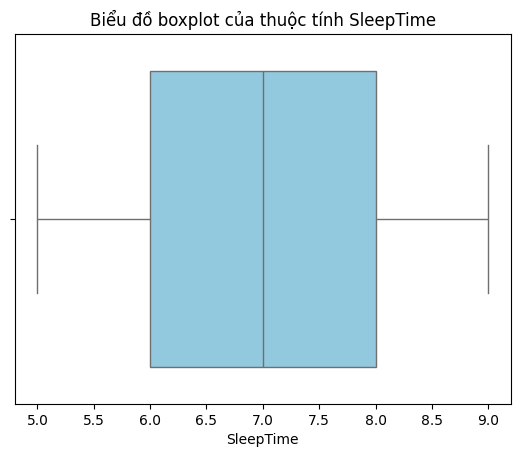

In [51]:
for col in numerical_features:
    print(col, df[col].unique())    
    sns.boxplot(x=df[col], color="skyblue")
    plt.title("Biểu đồ boxplot của thuộc tính " + col)
    plt.show()

In [52]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Mã hóa thuộc tính phân loại thành thuộc tính số thứ tự

In [53]:
# Xác định các cột phân loại và số
categorical_cols = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
    'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Encode categorical
ordinal_encoder = OrdinalEncoder()
X_cat = ordinal_encoder.fit_transform(X[categorical_cols])
X_num = X[numerical_cols].values

# Ghép lại đúng thứ tự
X_all = np.concatenate([X_num, X_cat], axis=1)
feature_order = numerical_cols + categorical_cols

# Encode label
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

Mã hóa thuộc tính HeartDisease sang dạng nhị phân

In [54]:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

Kiểm tra độ cân bằng của dữ liệu

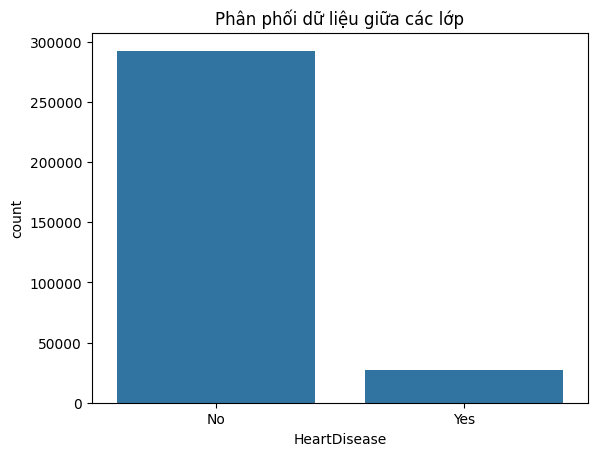

In [55]:
sns.countplot(x=df['HeartDisease'])
plt.title("Phân phối dữ liệu giữa các lớp")
plt.show()

In [56]:
df['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64

In [57]:
smote = SMOTE(sampling_strategy=0.5, random_state=55)
X_all, y_enc = smote.fit_resample(X_all, y_enc)
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=55)
X_all, y_enc = under_sampler.fit_resample(X_all, y_enc)

Build Model

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_all, y_enc, test_size=0.2, random_state=55)

RandomForest

In [59]:
min_samples_split_list = [ 50, 100, 200, 500]
max_depth_list = [3, 5, 10, 15, 20, None]
n_estimators_list = [10,50,100,500]

In [60]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
param_grid = {
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'n_estimators': n_estimators_list
}

In [61]:
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# Ket qua
# Best parameters: {'max_depth': None, 'min_samples_split': 50, 'n_estimators': 500}
# Best score: 0.9094371499896324

In [62]:
rf_model = RandomForestClassifier(max_depth=None, min_samples_split=50, n_estimators=500, random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=50, n_estimators=500, random_state=55)

In [63]:
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
recall = recall_score(y_val, y_pred)
print("Recall: ", recall)

Accuracy:  0.8972044113875353
Recall:  0.8790253876299199


XGBOOST

In [64]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [65]:
xgb = XGBClassifier(max_depth=None , min_samples_split = 50, m_estimators=500, verbosity=1, random_state=RANDOM_STATE, early_stopping_rounds=10)
xgb.fit(X_train, y_train,
        eval_set=[(X_train_eval, y_train_eval)])


[0]	validation_0-logloss:0.57493
[1]	validation_0-logloss:0.50471
[2]	validation_0-logloss:0.45932
[3]	validation_0-logloss:0.42517
[4]	validation_0-logloss:0.40098
[5]	validation_0-logloss:0.37995
[6]	validation_0-logloss:0.36280
[7]	validation_0-logloss:0.35118
[8]	validation_0-logloss:0.33758
[9]	validation_0-logloss:0.32403


c:\Users\ddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:11:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "m_estimators", "min_samples_split" } are not used.

  self.starting_round = model.num_boosted_rounds()


[10]	validation_0-logloss:0.31418
[11]	validation_0-logloss:0.30883
[12]	validation_0-logloss:0.30291
[13]	validation_0-logloss:0.29548
[14]	validation_0-logloss:0.29017
[15]	validation_0-logloss:0.28522
[16]	validation_0-logloss:0.28185
[17]	validation_0-logloss:0.27767
[18]	validation_0-logloss:0.27519
[19]	validation_0-logloss:0.26838
[20]	validation_0-logloss:0.26581
[21]	validation_0-logloss:0.26332
[22]	validation_0-logloss:0.26017
[23]	validation_0-logloss:0.25646
[24]	validation_0-logloss:0.25428
[25]	validation_0-logloss:0.25232
[26]	validation_0-logloss:0.25086
[27]	validation_0-logloss:0.24914
[28]	validation_0-logloss:0.24771
[29]	validation_0-logloss:0.24557
[30]	validation_0-logloss:0.24456
[31]	validation_0-logloss:0.24358
[32]	validation_0-logloss:0.24255
[33]	validation_0-logloss:0.24141
[34]	validation_0-logloss:0.24011
[35]	validation_0-logloss:0.23906
[36]	validation_0-logloss:0.23830
[37]	validation_0-logloss:0.23730
[38]	validation_0-logloss:0.23679
[39]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, m_estimators=500, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_split=50, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [66]:
y_pred = xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)
recall = recall_score(y_val, y_pred)
print("Recall: ", recall)

Accuracy:  0.8983329058733008
Recall:  0.8579315045152496


In [ ]:
import pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')
